# Assignment: Image Classification on MNIST Dataset

## Objective
In this assignment, you will build an image classification model using the MNIST dataset. The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0-9). You will perform the following tasks:
1. Load and preprocess the dataset.
2. Build and train a neural network for digit classification.
3. Analyze if overfitting is occurring and apply techniques to minimize it.


```python
import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Explore the dataset
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")
```



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8480 - loss: 0.6494 - val_accuracy: 0.9559 - val_loss: 0.2620
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9403 - loss: 0.3022 - val_accuracy: 0.9612 - val_loss: 0.2265
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9503 - loss: 0.2601 - val_accuracy: 0.9608 - val_loss: 0.2153
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9535 - loss: 0.2434 - val_accuracy: 0.9665 - val_loss: 0.1981
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9571 - loss: 0.2320 - val_accuracy: 0.9688 - val_loss: 0.1932
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9568 - loss: 0.2286 - val_accuracy: 0.9714 - val_loss: 0.1855
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9580 - loss: 0.2259 - val_accuracy: 0.9699 - val_loss: 0.1843
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9614 - loss: 0.2150 - 

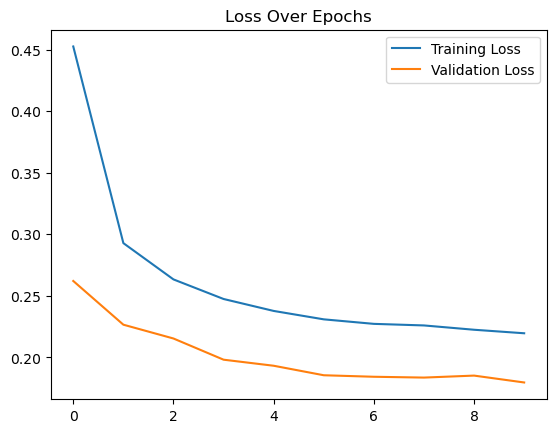

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),  # Added L2 regularization
    keras.layers.Dropout(0.3),  # Increased dropout to reduce overfitting
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

# Check for overfitting
if history.history['loss'][-1] < history.history['val_loss'][-1]:
    print("Model might be overfitting. Consider adding more regularization techniques.")

